## Performance and Selection Breakdowns

In [73]:
from util_functions.visualisation.asr_visualisation import *

In [75]:
utt2dur_paths = ['/home/alta/BLTSpeaking/active_learning-pr450/data/initial_sets/labelled_b450/fbk.asr+man/utt2dur']
metadata_path = "/home/alta/BLTSpeaking/convert-v2/lib/scores/BULATS_Speaking_MetaData_July_2013_Apr_2018.v1.txt"
lookup_path = "/home/alta/BLTSpeaking/convert-v2/4/lib/spId/BLXXXeval3-map.lst"

score_path_lc = '/home/alta/BLTSpeaking/active_learning-pr450/models/lc3/CTDF1_b50_lc50/tdnn-f/decode_LM1-int_b50_lc50.BLXXXeval3/decode_10.0_0.0.dtal.res'
score_path_r = '/home/alta/BLTSpeaking/active_learning-pr450/models/random1/CTDF1_b50_r50/tdnn-f/decode_LM1-int_b50_r50.BLXXXeval3/decode_10.0_0.0.dtal.res'

band_wer_breakdown = wers_from_res_file(score_path_lc, metadata_path, lookup_path)


All utterances checked: True


In [76]:
model = DecodingModelSurrogate(
    utt2dur_path = '/home/alta/BLTSpeaking/active_learning-pr450/data/initial_sets/labelled_b450/fbk.asr+man/utt2dur', 
    metadata_path = '/home/alta/BLTSpeaking/convert-v2/lib/scores/BULATS_Speaking_MetaData_July_2013_Nov_2017.v1.txt',
    lookup_path = "/home/alta/BLTSpeaking/convert-v2/4/lib/spId/BLXXXgrp17-map.lst",
    grapheme_lookup_path = '/home/alta/BLTSpeaking/active_learning-pr450/data/initial_sets/lang-LM1-int_b450/phones/align_lexicon.txt'
)

initial_utt_list_path = '../active_learning-pr450/data/initial_sets/utt_list.labelled_b50'
initial_band_counts, initial_band_durs, initial_selected_bulats = get_band_distribution_from_path(initial_utt_list_path, model)

step_1_utt_list_path = '../active_learning-pr450/data/lc1/utt_list.labelled_b50_lc50'
step_1_band_counts, step_1_band_durs, step_1_selected_bulats = get_band_distribution_from_path(step_1_utt_list_path, model)

step_2_utt_list_path = '../active_learning-pr450/data/lc7/utt_list.labelled_b50_lc50_lc100'
step_2_band_counts, step_2_band_durs, step_2_selected_bulats = get_band_distribution_from_path(step_2_utt_list_path, model)

total_utt_list_path = '../active_learning-pr450/data/initial_sets/utt_list.unlabelled_b0'
total_band_counts, total_band_durs, total_selected_bulats = get_band_distribution_from_path(total_utt_list_path, model)

100%|██████████| 158132/158132 [00:12<00:00, 13022.22it/s]


In [69]:
turn_dict_into_proportions(group_by_band_groups(total_band_counts, TMR_SPEAKING_BAND_TRANSLATION))

{'B1': 0.3763899741539941,
 'B2': 0.34537476708541204,
 'C': 0.07335056400392699,
 'A': 0.20488469475666687}

In [70]:
turn_dict_into_proportions(group_by_band_groups(initial_band_counts, TMR_SPEAKING_BAND_TRANSLATION))

{'B1': 0.3782133676092545,
 'B2': 0.35202442159383035,
 'C': 0.08145886889460155,
 'A': 0.18830334190231363}

In [72]:
turn_dict_into_proportions(group_by_band_groups(step_2_band_counts, TMR_SPEAKING_BAND_TRANSLATION))

{'B1': 0.3768707482993197,
 'B2': 0.2913896987366375,
 'C': 0.06643343051506317,
 'A': 0.2653061224489796}

## Audio Classification

In [2]:
import torch
import matplotlib.pyplot as plt

self_attention_evaluation_path = '/home/alta/BLTSpeaking/exp-pr450/lent_logs/listen_and_attend_classification/no_test_config-0/evaluations.pkl'
transformer_evaluation_path = '/home/alta/BLTSpeaking/exp-pr450/lent_logs/listen_and_attend_classification/no_test_config-1/evaluations.pkl'

self_attention_evaluation = torch.load(self_attention_evaluation_path)
transformer_evaluation = torch.load(transformer_evaluation_path)

(0.0, 1.0)

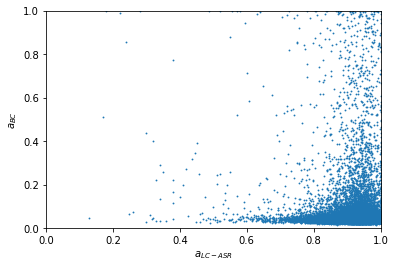

In [3]:
fig, axes = plt.subplots(1)

x = self_attention_evaluation['all_certainties']
axes.set_xlabel('$a_{LC-ASR}$')
y = self_attention_evaluation['all_preds'][:,1]
axes.set_ylabel('$a_{BC}$')
axes.scatter(x, y, s=0.7)
axes.set_ylim(0, 1)
axes.set_xlim(0, 1)

In [3]:
len(x)

43647

## DAF Active Learning for CIFAR

100%|██████████| 30/30 [00:00<00:00, 55.22it/s]


default_simple_cifar_convolutional_classifier 20001 268
default_mini_resnet_classifier 12501 128
default_mini_resnet_classifier 17501 174
default_mini_resnet_classifier 20001 79
default_mini_resnet_classifier 22501 5
default_mini_resnet_classifier 25001 0


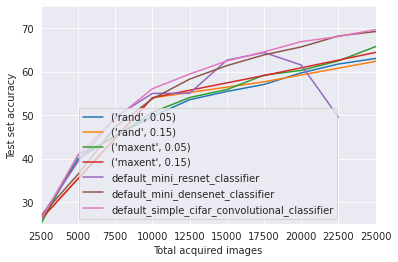

In [13]:
from util_functions.visualisation.cifar_al_viz import cifar_baseline_al_curves, visualise_performance_curves, get_json
from util_functions.visualisation.cifar_daf_viz import cifar_daf_al_curves
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1)

# Let's first get the baselines up:
absolute_base = 'lent_logs/cifar100_densenet_al_baseline/'
baseline_performance_curves = cifar_baseline_al_curves(absolute_base, 30, 15, True)
# baseline_performance_curves = {k: v for k, v in baseline_performance_curves.items() if k[1] == 0.15}
baseline_performance_curves = {k: [(a, b) for (a, b) in v if a[-1] > 30000] for k, v in baseline_performance_curves.items()}
axes = visualise_performance_curves(baseline_performance_curves, axes)

# Now the autoencoder DAFs:
absolute_daf_base = '/home/alta/BLTSpeaking/exp-pr450/lent_logs/cifar100_labelled_classification_daf_active_learning'
daf_performance_curves = cifar_daf_al_curves(absolute_daf_base)

# Can remove this later
daf_performance_curves = {k: list(filter(lambda x: x!=([], []), v)) for k, v in daf_performance_curves.items()}
daf_performance_curves = {k: v for k, v in daf_performance_curves.items() if v != []}

axes = visualise_performance_curves(daf_performance_curves, axes)
axes.set_ylim(25, 75)
axes.set_xlim(2500, 25000)
axes.set_xlabel('Total acquired images')
axes.set_ylabel('Test set accuracy')
axes.legend()

In [4]:
from config.ootb_architectures import *

model = default_simple_cifar_convolutional_classifier(0, True)
print(sum(p.numel() for p in model.parameters()))

model = default_mini_resnet_classifier()
print(sum(p.numel() for p in model.parameters()))

model = default_mini_densenet_classifier(0.0)
print(sum(p.numel() for p in model.parameters()))


1241282
Total miniature resnet DAF params: 0.08M
77522
Total miniature densenet DAF params: 0.00M
1106
